In [18]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

path = './cat-dog'

데이터 증식(Data argumentaion)을 위해 케라스에서 제공하는 이미지 제너레이터를 사용합니다.  
이미지의 위치를 조금 옮긴다거나, 회전, 좌우반전등을 했을 때 컴퓨터가 받아들이는 이미지는 전혀 다른것이 됩니다.  
이러한 변형을 줌으로써 학습 데이터를 늘리고, 이러한 변조에 강하게 모델을 학습시킬 수 있습니다.  

rescale은 이미지의 nomalization을 위해 사용합니다. 각 이미지별로 255로 나눈 값으로 데이터가 변형됩니다.  
rotation_range는 이미지의 최대 회전각을 지정합니다. 최대 20도까지 회전합니다.  
width,height shift_range는 이미지의 이동을 말합니다. 좌우, 위아래로 이미지의 이동하는 백분율을 지정합니다. (0.1은 10%)  
brightness_range는 이미지 밝기에 대한 내용입니다.  
horizontal_flip은 이미지의 수평 반전을 시켜줍니다.  
이 옵션의 경우 데이터셋의 이해가 필요합니다.  
예를 들면 MNIST 데이터셋의 경우 손글씨 데이터이기 때문에 수평 반전이 일어나면 안됩니다.  
validation_split은 검증세트의 비율을 지정해줍니다.

In [17]:
imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

In [20]:
trainGen = imageGenerator.flow_from_directory(
    os.path.join(path, 'training_set'),
    target_size=(64, 64),
    subset='training'
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join(path, 'training_set'),
    target_size=(64, 64),
    subset='validation'
)

Found 7205 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

Using TensorFlow backend.


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()

model.add(layers.InputLayer(input_shape=(64, 64, 3)))
model.add(layers.Conv2D(16, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(32, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(64, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
___________________________

In [31]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['acc'],
)

In [37]:
epochs = 30
history = model.fit_generator(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
)

Epoch 1/30
226/226 [==============================] - 151s 668ms/step - loss: 0.6267 - acc: 0.6428 - val_loss: 0.6077 - val_acc: 0.6831
Epoch 2/30
226/226 [==============================] - 78s 343ms/step - loss: 0.6122 - acc: 0.6578 - val_loss: 0.5941 - val_acc: 0.6719
Epoch 3/30
226/226 [==============================] - 54s 240ms/step - loss: 0.5948 - acc: 0.6842 - val_loss: 0.5840 - val_acc: 0.6831
Epoch 4/30
226/226 [==============================] - 57s 253ms/step - loss: 0.5876 - acc: 0.6876 - val_loss: 0.5728 - val_acc: 0.6988
Epoch 5/30
226/226 [==============================] - 59s 262ms/step - loss: 0.5824 - acc: 0.6949 - val_loss: 0.5646 - val_acc: 0.7125
Epoch 6/30
226/226 [==============================] - 56s 247ms/step - loss: 0.5730 - acc: 0.6931 - val_loss: 0.5454 - val_acc: 0.7163
Epoch 7/30
226/226 [==============================] - 53s 236ms/step - loss: 0.5670 - acc: 0.6982 - val_loss: 0.5353 - val_acc: 0.7256
Epoch 8/30
226/226 [==============================] - 

In [38]:
testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = imageGenerator.flow_from_directory(
    os.path.join(path, 'test_set'),
    target_size=(64, 64),
)

model.evaluate_generator(testGen)

Found 2023 images belonging to 2 classes.


[0.48979128152132034, 0.7706377]

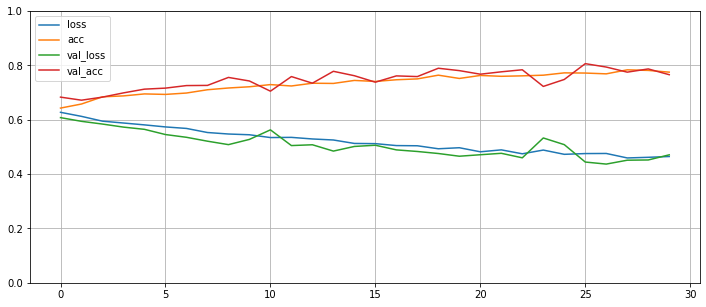

In [39]:
pd.DataFrame(history.history).plot(figsize=(12, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [40]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

예측: 고양이
정답: 고양이


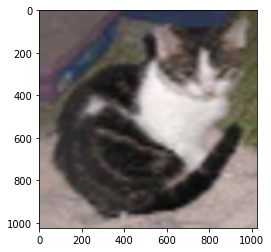

In [55]:
cls_index = ['고양이', '개']

imgs = testGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((1024, 1024))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))